<h1> PROJECT OVERVIEW </H1>

descrivere lo scopo del progetto - obiettivi, cosa faremo, contesto di lavoro (spiegare come funzionano inverter energia ecc..)

<h2>Importing Libraries </h2>

In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

<H2>Exploratory Data Analysis </h2>

<h3>Loading The Data</h3>

descrizione da dove abbiamo preso i dati e cosa rappresentano, come sono organizzati

In [2]:
#plant 1 generation data 
p1_gen_df = pd.read_csv('Plant_1_Generation_Data.csv')

#plant 2 generation data
p2_gen_df = pd.read_csv('Plant_2_Generation_Data.csv')

#plant 1 weather sensor data
p1_wea_df = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

#plant 2 weather sensor data
p2_wea_df = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

<h3> EDA Generation Data Plant 1</h3>

dire che inizialmente condurremo l'analisi solo sul primo impianto, in seguito lavoreremo anche sul secondo

<h3>First Look </h3>

In [3]:
#first 5 rows of the generation data for plant 1
p1_gen_df.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
#last 5 rows of the generation data for plant 1
p1_gen_df.tail(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0
68777,17-06-2020 23:45,4135001,zVJPv84UY57bAof,0.0,0.0,5910.000,7363272.0


descrizione / spiegazione generation data df e delle sue varibili

<h3>Shape and Size</h3>

In [12]:
# shape and size of the dataset
p1_gen_shape = p1_gen_df.shape
p1_gen_size = p1_gen_df.size
print(f'The Generation Data for the plant 1 is composed by: {p1_gen_shape[0]} rows and {p1_gen_shape[1]} columns.\nFor a total of {p1_gen_size} values')

The Generation Data for the plant 1 is composed by: 68778 rows and 7 columns.
For a total of 481446 values


<h3>Dataframe Info</h3>

In [13]:
#information about the Generation Data for the plant 1
p1_gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


The dataframe info command give us useful information about the type of the features, the number of null-values and the dimension of the dataset. We can simply notice that the for each columns of the dataset the number of non-null values is the same of the number of rows of the entire dataset, it means that we don't have null values.

<h3>Missing Data </h3>

In [14]:
#to be sure, we can still check for null values
p1_gen_df.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

we don't have missing data.

<h3>Statistics Summary</h3>

In [16]:
#statistics description of the generation data for the plant 1
p1_gen_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PLANT_ID,68778.0,4.135001e+06,0.000000,4135001.0,4.135001e+06,4.135001e+06,4.135001e+06,4135001.000
DC_POWER,68778.0,3.147426e+03,4036.457169,0.0,0.000000e+00,4.290000e+02,6.366964e+03,14471.125
AC_POWER,68778.0,3.078028e+02,394.396439,0.0,0.000000e+00,4.149375e+01,6.236187e+02,1410.950
DAILY_YIELD,68778.0,3.295969e+03,3145.178309,0.0,0.000000e+00,2.658714e+03,6.274000e+03,9163.000
TOTAL_YIELD,68778.0,6.978712e+06,416271.982856,6183645.0,6.512003e+06,7.146685e+06,7.268706e+06,7846821.000


The .describe() method provide a statistics summary of data belonging to numerical datatype for our dataset

<h3>Column Names</h3>

In [19]:
#adjusting the name of the columns in order to make it easier to work with
p1_gen_df.columns = list(map(lambda x : x.lower(),p1_gen_df.columns))
p1_gen_df.columns

Index(['date_time', 'plant_id', 'source_key', 'dc_power', 'ac_power',
       'daily_yield', 'total_yield'],
      dtype='object')

<h3>Feature Analysis</h3>

In [36]:
#date_time
p1_gen_df['date_time']

0       2020-05-15 00:00:00
1       2020-05-15 00:00:00
2       2020-05-15 00:00:00
3       2020-05-15 00:00:00
4       2020-05-15 00:00:00
                ...        
68773   2020-06-17 23:45:00
68774   2020-06-17 23:45:00
68775   2020-06-17 23:45:00
68776   2020-06-17 23:45:00
68777   2020-06-17 23:45:00
Name: date_time, Length: 68778, dtype: datetime64[ns]

In the date time column we have the values every 15 min from 15-05-2020 0:00 until 17-06-2020 23:45. In order to make it easier to work with dates we convert them to time date format

In [23]:
#converting the date_time column in format: datetime ('<M8[ns]')
p1_gen_df['date_time'] = pd.to_datetime(p1_gen_df['date_time'])
p1_gen_df['date_time'].dtype

dtype('<M8[ns]')

In [39]:
#source_key
p1_invertes = p1_gen_df['source_key'].value_counts().index
p1_invertes

Index(['bvBOhCH3iADSZry', '1BY6WEcLGh8j5v7', '7JYdWkrLSPkdwr4',
       'VHMLBKoKgIrUVDU', 'ZnxXDlPa8U1GXgE', 'ih0vzX44oOqAx2f',
       'z9Y9gH1T5YWrNuG', 'wCURE6d3bPkepu2', 'uHbuxQJl8lW7ozc',
       'pkci93gMrogZuBj', 'iCRJl6heRkivqQ3', 'rGa61gmuvPhdLxV',
       'sjndEbLyjtCKgGv', 'McdE0feGgRqW7Ca', 'zVJPv84UY57bAof',
       'ZoEaEvLYb1n2sOq', '1IF53ai7Xc0U56Y', 'adLQvlD726eNBSB',
       'zBIq5rxdHJRwDNY', 'WRmjgnKYAwPKWDb', '3PZuoBAID5Wc2HD',
       'YxYtjZvoooNbGkE'],
      dtype='object')

The Plant 1 is composed by 22 inversters which we have observations over time, those above are the names of the different inverters.

<h3>Outliers</h3>

Managing outliers is important to ensure the accuracy and reliability of a machine learning model. We will try to identify and manage the presence of such values in the columns: 'dc_power', 'ac_power', 'daily_yield', 'total_yield'

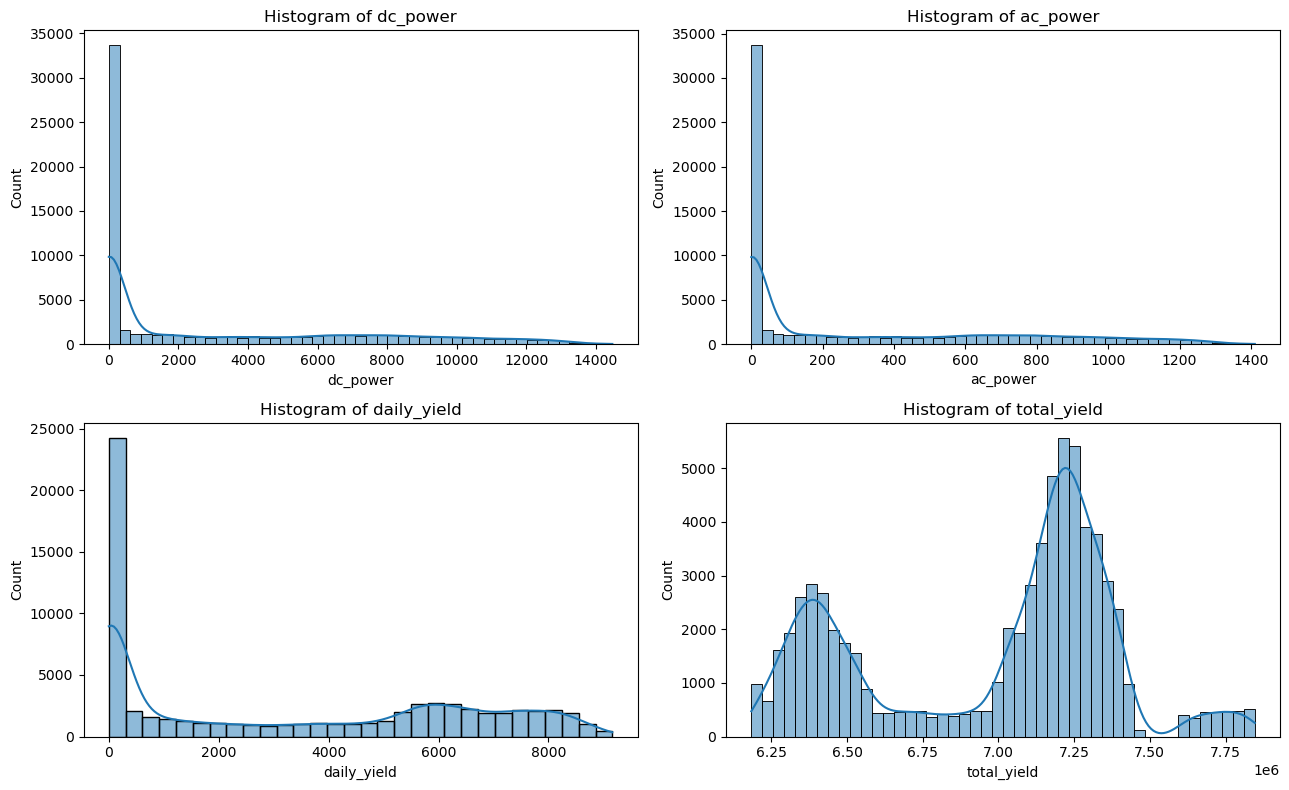

In [65]:
#creating the histograms for this columns
columns_to_check = ['dc_power','ac_power','daily_yield','total_yield']

num_col = len(columns_to_check)
num_rows = (num_col // 2) + (num_col % 2)

#creating the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(13,4 * num_rows))

axes = axes.flatten()

for ax, col in zip(axes, columns_to_check):
    sns.histplot(p1_gen_df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

In order to see more clearly the outliers we will build the boxplots

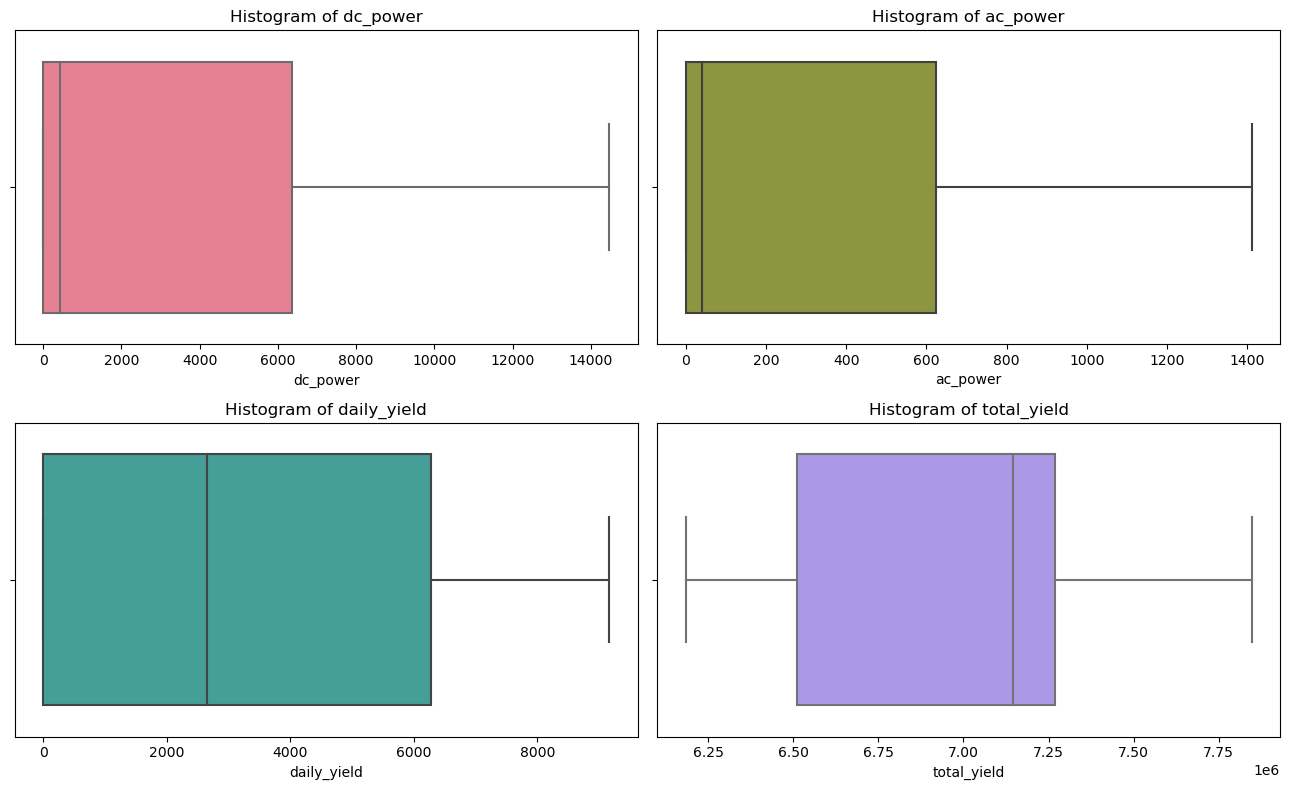

In [70]:
#creating the relative boxplots

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(13,4 * num_rows))

axes = axes.flatten()
colors = sns.color_palette("husl", len(columns_to_check))

for ax, col, color in zip(axes, columns_to_check, colors):
    sns.boxplot(x=p1_gen_df[col], ax = ax, color= color)
    ax.set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

<h3>IQR Method</h3>

In [78]:
#for dc_power
q1 = p1_gen_df['ac_power'].quantile(0.25)
q3 = p1_gen_df['ac_power'].quantile(0.75)
iqr = q3 - q1
q1, q3, iqr

(0.0, 623.61875, 623.61875)

In [77]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
upper_limit, lower_limit

(1559.046875, -935.4281249999999)

In [79]:
#find the otliers on out datasets
p1_gen_df.loc[(p1_gen_df['dc_power'] > upper_limit) | (p1_gen_df['dc_power'] < lower_limit)]

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield
596,2020-05-15 07:00:00,4135001,1BY6WEcLGh8j5v7,1734.571429,170.014286,72.714286,6259631.714
597,2020-05-15 07:00:00,4135001,1IF53ai7Xc0U56Y,1990.375000,195.100000,82.375000,6183727.375
598,2020-05-15 07:00:00,4135001,3PZuoBAID5Wc2HD,1963.375000,192.450000,79.500000,6987838.500
599,2020-05-15 07:00:00,4135001,7JYdWkrLSPkdwr4,1904.428571,186.700000,80.000000,7603040.000
600,2020-05-15 07:00:00,4135001,McdE0feGgRqW7Ca,1920.250000,188.250000,80.250000,7159044.250
...,...,...,...,...,...,...,...
68200,2020-06-17 17:15:00,4135001,sjndEbLyjtCKgGv,1573.125000,153.825000,5785.625000,7261579.625
68201,2020-06-17 17:15:00,4135001,uHbuxQJl8lW7ozc,1590.750000,155.737500,5863.625000,7286898.625
68202,2020-06-17 17:15:00,4135001,wCURE6d3bPkepu2,1562.625000,152.800000,5782.625000,7028500.625
68203,2020-06-17 17:15:00,4135001,z9Y9gH1T5YWrNuG,1564.500000,152.912500,5718.125000,7251103.125


????? cosi tanti otlier?? siamo sicuri che nel nostro dataset dobbiamo gestirli???? 

<H3> EDA Weather Sensor Data Plant 1</h3>

In [6]:
p1_wea_df.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [7]:
p2_wea_df.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


descrizione / spiegazione weather sensor data df 